Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB

First 5 rows:
    Invo

<ipython-input-5-0e8fbded0d25>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


            Yangon   Naypyitaw     Mandalay     Quantity       Tax 5%  \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean      0.340000     0.32800     0.332000     5.462000    15.526035   
min       0.000000     0.00000     0.000000    -8.000000     0.508500   
25%       0.000000     0.00000     0.000000     3.000000     6.044750   
50%       0.000000     0.00000     0.000000     5.000000    12.236250   
75%       1.000000     1.00000     1.000000     8.000000    22.725375   
max       1.000000     1.00000     1.000000    10.000000    49.650000   
std       0.473946     0.46972     0.471167     3.012247    11.754928   

             Total                        Date       Rating    Year  \
count   999.000000                        1000  1000.000000  1000.0   
mean    322.197419  2019-02-14 00:05:45.600000     7.060000  2019.0   
min      10.678500         2019-01-01 00:00:00     4.000000  2019.0   
25%     123.789750         2019-01-24 00:00:00     5.50000

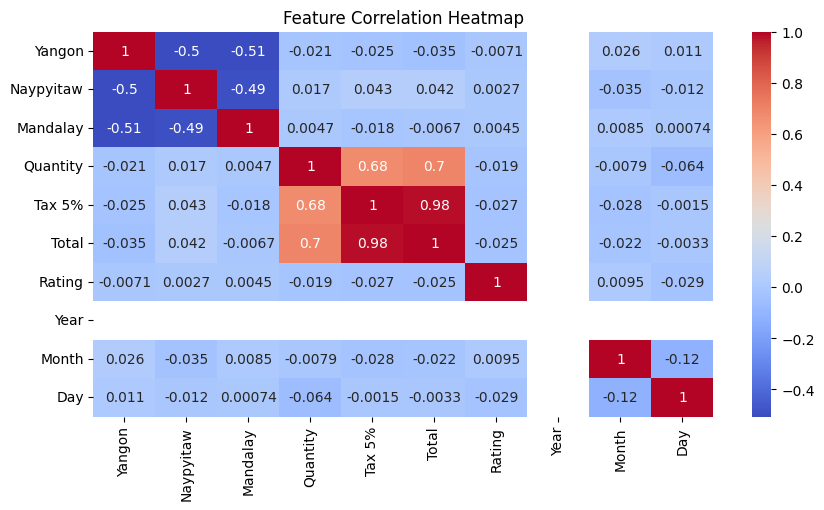


Data Wrangling Complete. Cleaned file saved.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Python Project Data - Supermarket Sales.csv")

# Display basic info and first few rows
print("Dataset Info:")
data.info()
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Handling missing values (if any exist)
data.fillna(method='ffill', inplace=True)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")
if duplicates > 0:
    data.drop_duplicates(inplace=True)

# Convert Date column to datetime format (if applicable)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Feature Engineering (Example: Extracting Year, Month, Day from Date)
if 'Date' in data.columns:
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

# Checking data types
print("\nData Types:")
print(data.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Data Visualization - Exclude non-numeric columns before correlation matrix
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


print("\nData Wrangling Complete. Cleaned file saved.")
